# Persipkan environment YOLOv8


Membuat direktori dataset menggunakan perintah `mkdir` dan masuk direktori dataset meggunakan perintah `cd`

In [ ]:
!mkdir food_detection
%cd food_detection

Clone *source code* YOLOv8 dari Github.

In [ ]:
!git clone https://github.com/ultralytics/ultralytics

Install semua daftar dependency/package Python yang diperlukan

In [ ]:
%cd ultralytics
!pip install -r requirements.txt # install dependencies

Install roboflow package menggunakan `pip`

In [ ]:
%pip install -q roboflow

# Persiapan Dataset

In [ ]:
import os

os.environ["DATASET_DIRECTORY"] = "/content/food_detection/datasets"

Download dataset menggunakan `API Roboflow`

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GWstKR3lq9zg6NozrKMX")
project = rf.workspace("nutriscan").project("tesnutriscan")
dataset = project.version(1).download("yolov8")

Periksa total kategori/class pada anotasi ground-truth dari dataset

In [ ]:
from glob import glob

labels_train = glob("/content/food_detection/datasets/TesNutriscan-1/train/labels/*.txt")
amount_per_class = {}

for i in range(len(labels_train)):
  f = open(labels_train[i], "r")
  for anotate in f:
      if anotate[0] not in amount_per_class.keys():
        amount_per_class[anotate[0]] = 1
      else:
        amount_per_class[anotate[0]] += 1

print(f"Jumlah total objek pada train: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class pada train: {amount_per_class}')

Jumlah total objek pada train: 9507
Jumlah objek per class pada train: {'1': 1293, '2': 1335, '3': 1770, '5': 1899, '6': 1059, '4': 1401, '9': 429, '7': 174, '8': 147}


In [ ]:
labels_valid = glob("/content/food_detection/datasets/TesNutriscan-1/valid/labels/*.txt")
amount_per_class = {}

for i in range(len(labels_valid)):
  f = open(labels_valid[i], "r")
  for anotate in f:
      if anotate[0] not in amount_per_class.keys():
        amount_per_class[anotate[0]] = 1
      else:
        amount_per_class[anotate[0]] += 1

print(f"Jumlah total objek pada validation: {sum(amount_per_class.values())}")
print(f'Jumlah objek per class pada validation: {amount_per_class}')

Jumlah total objek pada validation: 1133
Jumlah objek per class pada validation: {'6': 102, '4': 159, '2': 157, '1': 203, '3': 209, '9': 50, '5': 227, '7': 8, '8': 16, '0': 2}


Membuat `dataset.yaml` untuk menyimpan konfigurasi dataset yang akan di training

In [ ]:
%cd /content/food_detection

/content/food_detection


## Persiapan *working directory* dan *training resources*

PROSES TRAIN

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)
# Use the model
model.train(data="/content/food_detection/datasets/TesNutriscan-1/data.yaml", epochs=50)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
success = model.export(format="onnx")  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



**Model Val**

In [ ]:
results = model.val()

Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/food_detection/datasets/TesNutriscan-1/valid/labels.cache... 543 images, 0 backgrounds, 0 corrupt: 100%|██████████| 543/543 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  2.86it/s]
                   all        543       1133       0.67      0.589      0.627      0.384
                    13        543          2          0          0          0          0
                    14        543          1          0          0          0          0
                  apel        543          8      0.757       0.75      0.784      0.554
                  arem        543         16      0.587      0.562      0.637      0.334
                  ayam        543         50      0.533      0.411      0.424       0.23
                bakpia        543         11      0.537      0.545      0.53

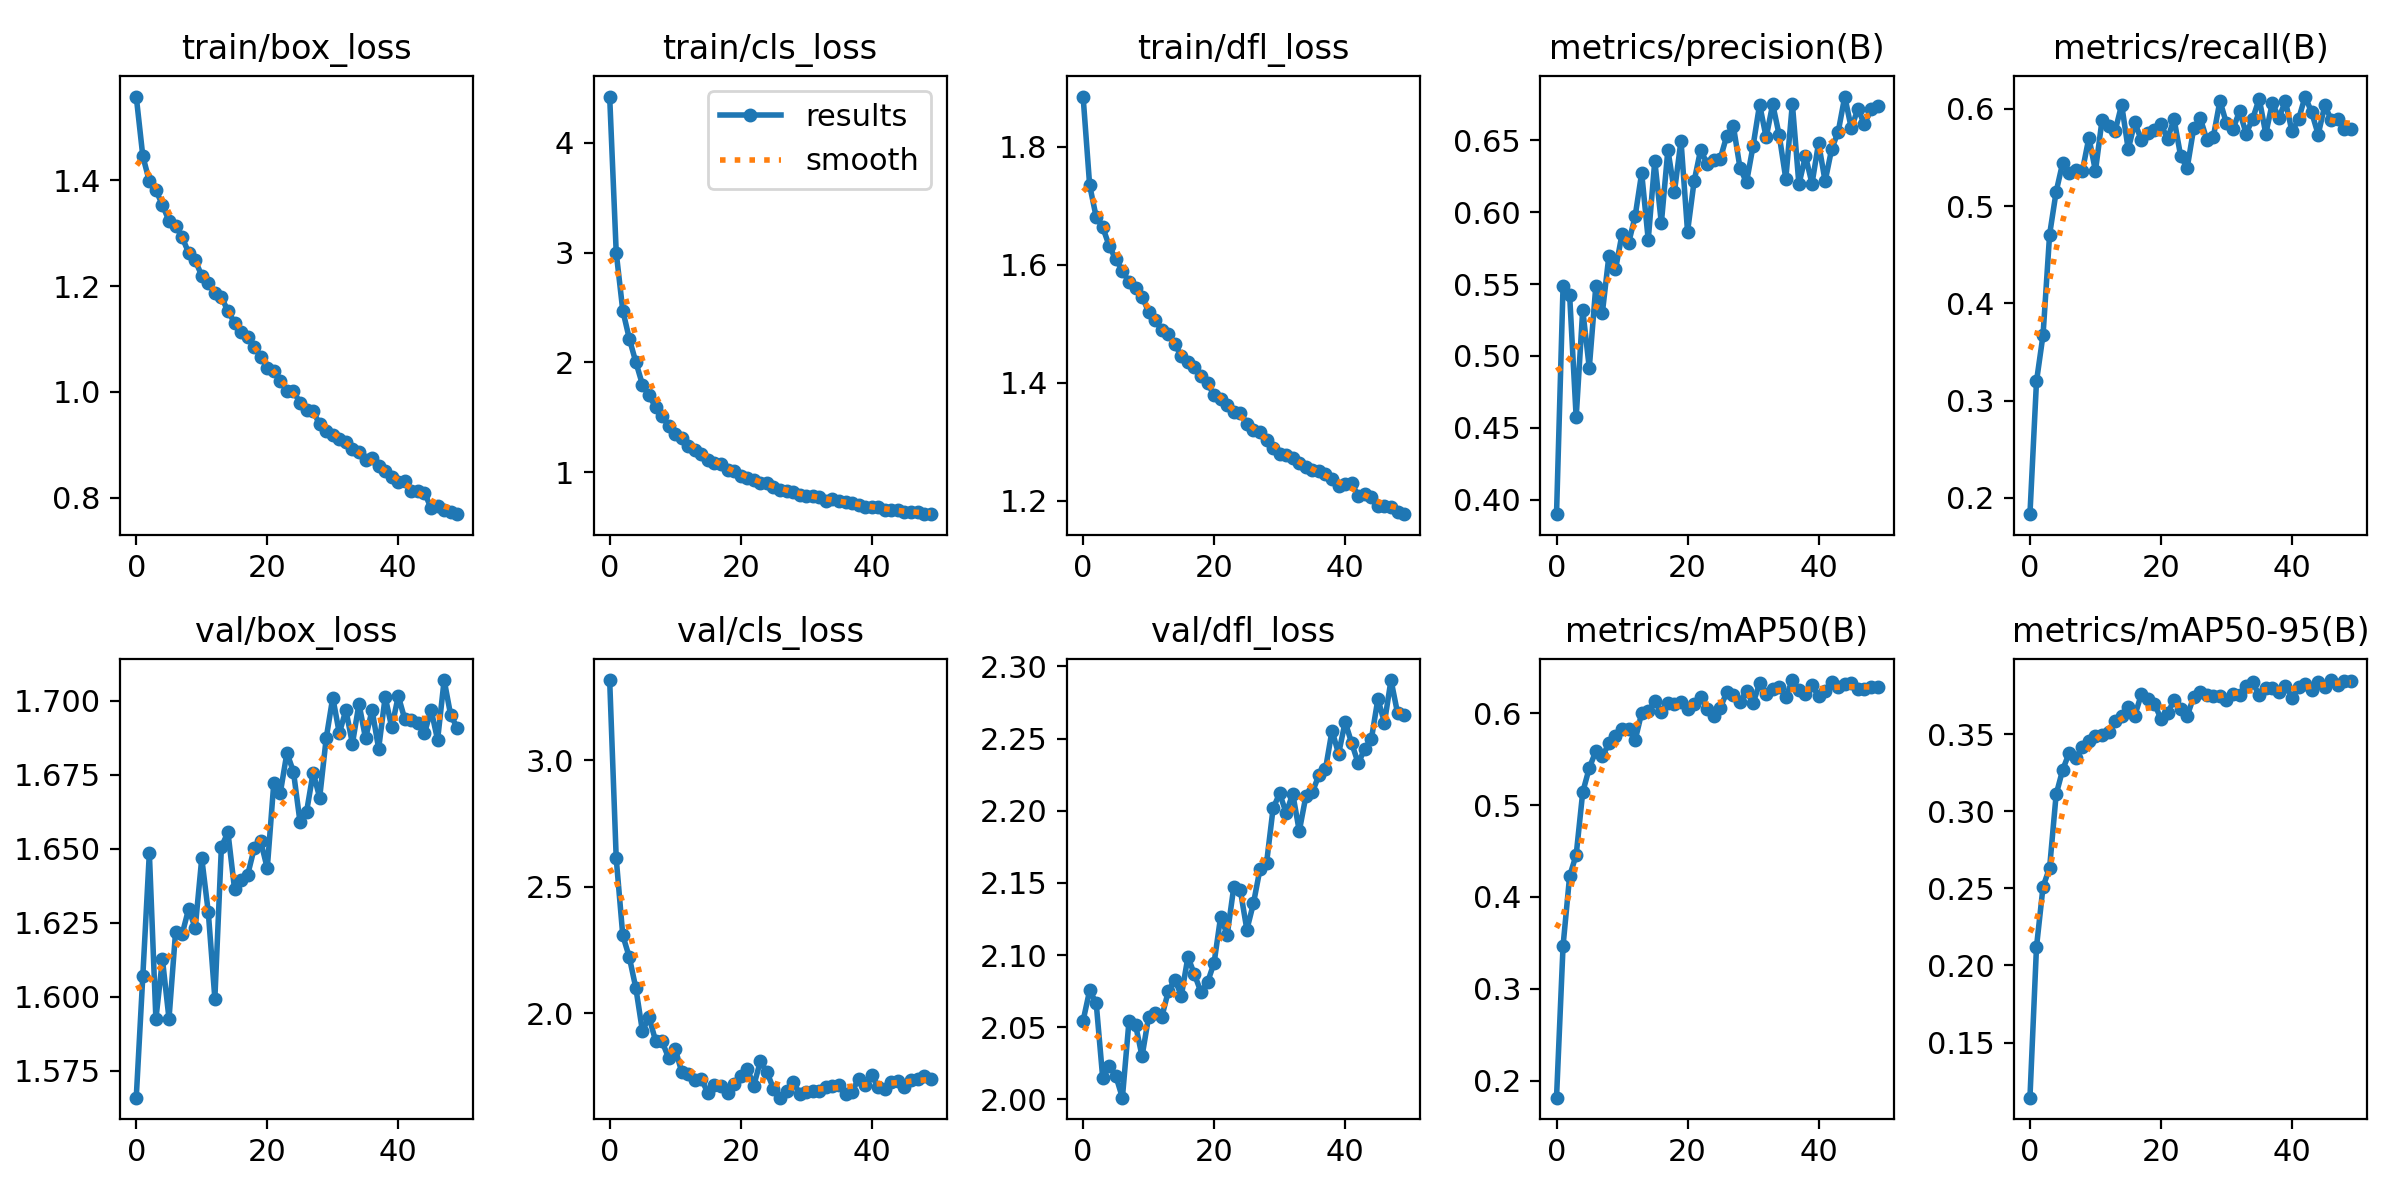

In [ ]:
from IPython.display import Image
Image(filename='/content/food_detection/ultralytics/runs/detect/train/results.png')

## Mencoba hasil training

In [ ]:
results = model.track('/content/food_detection/datasets/TesNutriscan-1/test/images', save=True)

In [ ]:
from IPython.display import Image, display
import glob

for imageName in glob.glob('/content/food_detection/ultralytics/runs/detect/track/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Download model YOLOv8

In [ ]:
from google.colab import files
files.download('/content/food_detection/ultralytics/runs/detect/train/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Export model ke SavedModel

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.pt')  # load an official model
model = YOLO('/content/food_detection/ultralytics/runs/detect/train/weights/best.pt')  # load a custom trained

# Export the model
model.export(format='saved_model')
